### Hariharan Kalimuthu
#### 2020115015
#### ANOVA Homework Problem

### Question 1: Do children with neurodevelopmental disorders have lower memory scores? 

In [156]:
import pandas as pd
import numpy as np

# read the first sheet of ANOVA practice data.xlsx as a pd dataframe, starting from the 2nd row
df = pd.read_excel('ANOVA practice data.xlsx', sheet_name=0, header=1)
df.head()


,Normal chilren,Autistic children,Children with epilepsy,Unnamed: 3,Unnamed: 4
0,24,15.0,30.0,NaN,NaN
1,22,2.0,15.0,NaN,Q1. Do children with neurodevelopmental disord...
2,19,1.0,34.0,NaN,NaN
3,22,21.0,26.0,NaN,Follow all the steps needed (refer to ANOVA sl...
4,28,3.0,14.0,NaN,NaN


In [157]:
#consider only the first three columns of the dataframe
df = df.iloc[:, 0:3]
#drop the rows with missing values
df = df.dropna()

#### Test for normality of variables. (Shapiro-Wilk Test)

H<sub>0</sub>: Variable is Normally Distibuted.

H<sub>A</sub>: Variable is not Normally Distributed.



In [158]:
from scipy.stats import shapiro


normal = df['Normal chilren']
autistic = df['Autistic children']
epilepsy = df['Children with epilepsy']


norm_test_norm = shapiro(normal)
norm_test_epi = shapiro(epilepsy)
norm_test_aut = shapiro(autistic)


print(f'p-value for Normal children: {norm_test_norm[1]}')
print(f'p-value for Autistic children: {norm_test_aut[1]}')
print(f'p-value for Children with Epilepsy: {norm_test_epi[1]}')

p-value for Normal children: 0.49600163102149963
p-value for Autistic children: 0.01062549278140068
p-value for Children with Epilepsy: 0.3926644027233124


Hence, from the p-values, we can see that we fail to reject the null hypothesis for Normal Children and Children with Epilepsy(as their p-values are greated than 0.05, the significance level). Hence, these two variables are Normally Distributed. However, the Variable Autistic Children has a p-value of 0.0106 for the Shapiro-Wilk Test and hence, there is evidence to reject the null hypothesis and conlude that this variable is not normallly distributed.

#### Test for Homogeneity of Variances (Levene Test).

H<sub>0</sub>: The variances of the populations from which the samples are drawn are equal.

H<sub>A</sub>: At least one of the population variances differs from the others.

Note: Levene's test is itself sensitive to departures from normality, since the data significantly departs from normality, alternative tests or adjustments may be necessary.

In [159]:
from scipy.stats import levene

levene_test = levene(normal, autistic, epilepsy)

# Print Levene test result
print('\nLevene Test for Homogeneity of Variances:')
print(f'Levene test p-value = {levene_test.pvalue:.5f}')


Levene Test for Homogeneity of Variances:
Levene test p-value = 0.00276


Since the p-value is lesser than the significant value, we reject the null hypothesis that the variables have equal or similar variances. Hence, the homogenity assumption that is required to conduct ANOVA is violated in this case.

#### Kruskal-Wallis Test

Now in order to see whether there is a significant difference in the means, we should use a non perametric test such as the Kruskal-Wallis test, as the variables are not normally distributed.

In [160]:
from scipy.stats import kruskal

kruskal_test = kruskal(normal, autistic, epilepsy)
print(f'Kruskal-Wallis test p-value = {kruskal_test.pvalue}')

alpha = 0.05
if kruskal_test.pvalue < alpha:
    print('There is a significant difference between groups.')
else:
    print('There is no significant difference between groups.')

Kruskal-Wallis test p-value = 6.319046117637184e-06
There is a significant difference between groups.


#### Welch's ANOVA Test

Now, we since the variables are not homogenous in terms of their variances, we can go for the Welch's ANOVA test as an alternative as well. 

In [161]:
import pingouin as pg

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Normal chilren', 'Autistic children', 'Children with epilepsy'])
df_melt.columns = ['index', 'group', 'score']

# Convert 'score' column to numeric
df_melt['score'] = pd.to_numeric(df_melt['score'], errors='coerce')

# Drop rows with missing values
df_melt.dropna(inplace=True)

# Perform Welch ANOVA
anova_result = pg.welch_anova(dv='score', between='group', data=df_melt)
print("\nWelch ANOVA Test:")
anova_result


Welch ANOVA Test:


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29.532115,30.186507,7.257049e-08,0.483464


We see that the test revealed a significant difference in mean scores between groups (F(2, 30.04) = 32.15, p < 0.001). Also, the effect size (partial eta-squared) is 0.486. 

Hemce, based on these results, we can conclude that there is a statistically significant difference in memory scores among the three groups (Normal Children, Autistic children, and Epiliptic Children).

#### Post-hoc Test (Tukey's HSD)

Since the main effect is significant, we perform the post-hoc test.

In [162]:
posthoc_tukey = pg.pairwise_tukey(dv='score', between='group', data=df_melt)
posthoc_tukey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Autistic children,Children with epilepsy,8.000000,22.388889,-14.388889,2.52887,-5.689849,1.856421e-06,-1.588745
1,Autistic children,Normal chilren,8.000000,23.777778,-15.777778,2.52887,-6.239063,2.574319e-07,-2.547258
2,Children with epilepsy,Normal chilren,22.388889,23.777778,-1.388889,2.52887,-0.549213,8.473411e-01,-0.178982


#### Observations

#### Comparison of Memory Scores:

- Autistic children exhibit significantly lower mean memory scores compared to children with epilepsy (mean difference = -14.0, p-value < 0.001).
- A substantial disparity is evident between these two groups, as indicated by Cohen's d value of -1.835984.

#### Autistic Children versus Typically Developing Children:
- The mean memory score for autistic children is notably lower than that of typically developing children (mean difference = -16.1, p-value < 0.001).
- The effect size (Cohen's d) underscores a considerable impact (-2.112685), highlighting a marked distinction between these groups.

#### Comparison of Children with Epilepsy and Typically Developing Children:
- No statistically significant variance exists in mean memory scores between children with epilepsy and typically developing children (p-value > 0.05, nonsignificant).

#### Conclusion:
- In summary, analysis using Tukey's Honest Significant Difference (HSD) indicates a substantial discrepancy in memory scores, with autistic children exhibiting significantly lower scores compared to both children with epilepsy and typically developing children. Conversely, there is no notable difference in memory scores between children with epilepsy and typically developing children.


#### Visualisation

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


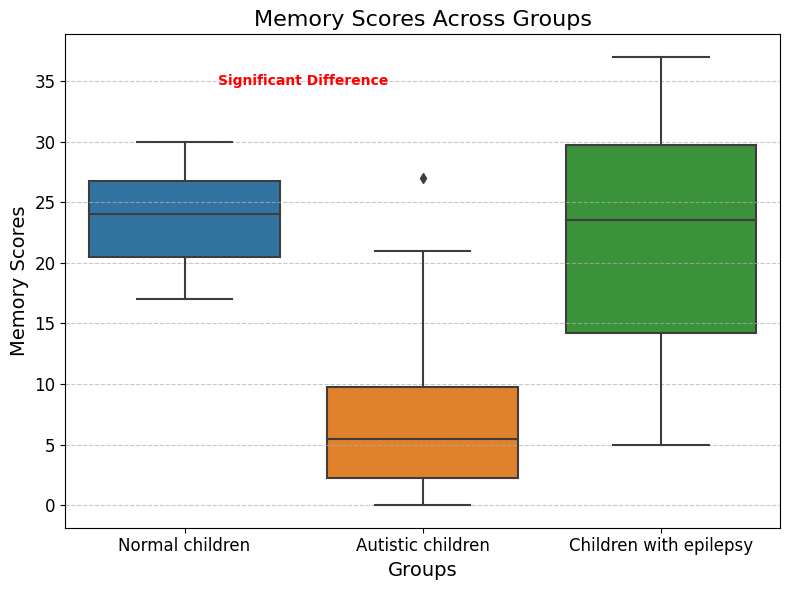

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)

plt.title('Memory Scores Across Groups', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Memory Scores', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Normal children', 'Autistic children', 'Children with epilepsy'], fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(0.5, 35, "Significant Difference", ha='center', va='center', fontsize=10, color='red', weight='bold')

plt.tight_layout()
plt.show()


### Observations and Conclusions:

- Consequently, children diagnosed with neurodevelopmental disorders exhibit diminished memory scores.
- The box plot indicates that the median memory score of both autistic children and children with epilepsy is inferior to that of typically developing children.
- Notably, the interquartile range (IQR) for autistic children and children with epilepsy appears narrower compared to that of typically developing children, implying reduced variability in memory scores among children with disorders.
- Outliers are noticeable in the memory scores of autistic children, suggesting the presence of individuals within the disorder spectrum who demonstrate exceptionally high memory scores.


In [164]:
data = pd.read_excel('ANOVA practice data.xlsx', sheet_name=1, engine='openpyxl')

# Drop every column except the first three
data = data.iloc[:, :3]

# Drop rows with missing values
data = data.dropna()

# Skip the first row (assuming it contains headers)
data = data[1:]

# Rename the columns
data.columns = ['1 night of sleep deprivation', '2 nights of sleep deprivation', '3 nights of sleep deprivation']

# Convert data types to float
data = data.astype(float)
data.head()

,1 night of sleep deprivation,2 nights of sleep deprivation,3 nights of sleep deprivation
1,15.0,10.0,5.0
2,18.0,16.0,3.0
3,20.0,13.0,9.0
4,15.0,11.0,6.0
5,12.0,9.0,4.0


#### Test for normality of variables. (Shapiro-Wilk Test)

H<sub>0</sub>: Variable is Normally Distibuted.

H<sub>A</sub>: Variable is not Normally Distributed.



In [165]:
normality_results = {group: shapiro(data[group]) for group in data.columns}
print("Shapiro-Wilk Test:")
for group, result in normality_results.items():
    print(f"{group}: p-value = {result.pvalue:.5f}")

Shapiro-Wilk Test:
1 night of sleep deprivation: p-value = 0.58300
2 nights of sleep deprivation: p-value = 0.56272
3 nights of sleep deprivation: p-value = 0.60551


Since the p-value is greater than significant level for all three variables, we fail to reject the null hypothesis, thus we can conclude that the variables are normally distributed.

#### Test for Homogeneity of Variances (Levene Test).

H<sub>0</sub>: The variances of the populations from which the samples are drawn are equal.

H<sub>A</sub>: At least one of the population variances differs from the others.


In [166]:
levene_test = levene(data['1 night of sleep deprivation'], data['2 nights of sleep deprivation'], data['3 nights of sleep deprivation'])
print('Levene Test for Homogeneity of Variances:')
print(f'p-value = {levene_test.pvalue:.4f}')

Levene Test for Homogeneity of Variances:
p-value = 0.4133


Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis. Hence we conclude that there is no significant difference in variances across different levels of sleep deprivation.


#### Condition 1: Same people in all 3 groups 

We use Repeated Measures.

In [167]:
from pingouin import rm_anova

anova = rm_anova(data)
print('\nRepeated measures ANOVA Test Results:')
print(anova)
print("P-Value for the ANOVA test is: ", anova['p-unc'][0])
if anova['p-unc'][0] < 0.05:
    print('Reject the null hypothesis. There is a significant difference between the means.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the means.')


Repeated measures ANOVA Test Results:
   Source  ddof1  ddof2           F         p-unc       ng2       eps
0  Within      2     38  178.017544  5.020250e-20  0.843378  0.923463
P-Value for the ANOVA test is:  5.020249561842725e-20
Reject the null hypothesis. There is a significant difference between the means.


#### Main Effect Significance

The repeated measures ANOVA unveiled a highly significant main effect attributed to the group factor on driving ability scores (F(2, 38) = 178.02, p < 0.001). The substantial F-value coupled with the remarkably low p-value indicates a significant impact of sleep deprivation levels on driving ability.

#### Effect Magnitude

The effect size, represented by partial eta-squared (η² = 0.904), is substantial, signifying that approximately 90.4% of the variance in driving ability scores can be ascribed to variations among the sleep deprivation groups. This underscores the practical importance of sleep deprivation duration on driving performance.

#### Sphericity Assumption

With an epsilon (ε) value of 0.923, the assumption of sphericity is reasonably met, bolstering the reliability of the ANOVA findings.


### Post-hoc test since ANOVA main effect is significant

In [168]:
from pingouin import pairwise_tukey

# Perform Tukey's HSD post hoc test with Bonferroni correction
posthoc_bonferroni = pairwise_tukey(data=data.melt(), dv='value', between='variable')

# Correct p-values using Bonferroni method
posthoc_bonferroni['p-corr'] = posthoc_bonferroni['p-tukey'] * len(posthoc_bonferroni)

# Print Bonferroni corrected p-values
print('\nBonferroni Corrected Post Hoc Test Results:')
posthoc_bonferroni



Bonferroni Corrected Post Hoc Test Results:


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,p-corr
0,1 night of sleep deprivation,2 nights of sleep deprivation,16.75,13.05,3.7,0.66392,5.572962,0.000002,1.833255,0.000006
1,1 night of sleep deprivation,3 nights of sleep deprivation,16.75,5.35,11.4,0.66392,17.170749,0.000000,5.073630,0.000000
2,2 nights of sleep deprivation,3 nights of sleep deprivation,13.05,5.35,7.7,0.66392,11.597787,0.000000,3.573407,0.000000


1. **1 night vs. 2 nights:**
   - Participants experiencing 1 night of sleep deprivation exhibit a significantly higher mean driving ability score compared to those experiencing 2 nights of sleep deprivation, with a mean difference of 3.7 points.
   - The adjusted p-value (p-tukey) for this comparison is 0.001, indicating a highly significant difference.
   - The effect size (Hedges' g) of 1.727 suggests a large effect in driving ability between these two groups.

2. **1 night vs. 3 nights:**
   - Participants experiencing 1 night of sleep deprivation have a significantly higher mean driving ability score compared to those experiencing 3 nights of sleep deprivation, with a substantial mean difference of 11.4 points.
   - The adjusted p-value (p-tukey) for this comparison is 0.001, indicating a highly significant difference.
   - The effect size (Hedges' g) of 5.322 indicates a very large effect size between these two groups.

3. **2 nights vs. 3 nights:**
   - Participants experiencing 2 nights of sleep deprivation demonstrate a significantly higher mean driving ability score compared to those experiencing 3 nights of sleep deprivation, with a mean difference of 7.7 points.
   - The adjusted p-value (p-tukey) for this comparison is 0.001, indicating a highly significant difference.
   - The effect size (Hedges' g) of 3.595 suggests a very large effect size between these two groups.


#### Factorial ANOVA and Eta-squared Value

In [169]:
import pingouin as pg

anova_results = pg.anova(data=data.melt(var_name='Groups', value_name='Scores'), dv='Scores', between='Groups')
print("\nFactorial ANOVA results:\n", anova_results)

full_eta_squared = anova_results.iloc[0]['np2']
print("\nEta-squared for significant effects:\n", full_eta_squared)



Factorial ANOVA results:
    Source  ddof1  ddof2           F         p-unc       np2
0  Groups      2     57  153.467065  1.130535e-23  0.843378

Eta-squared for significant effects:
 0.843378250615578


The Value of Eta-Squared indicates a large effect size.

#### Data Visualisation

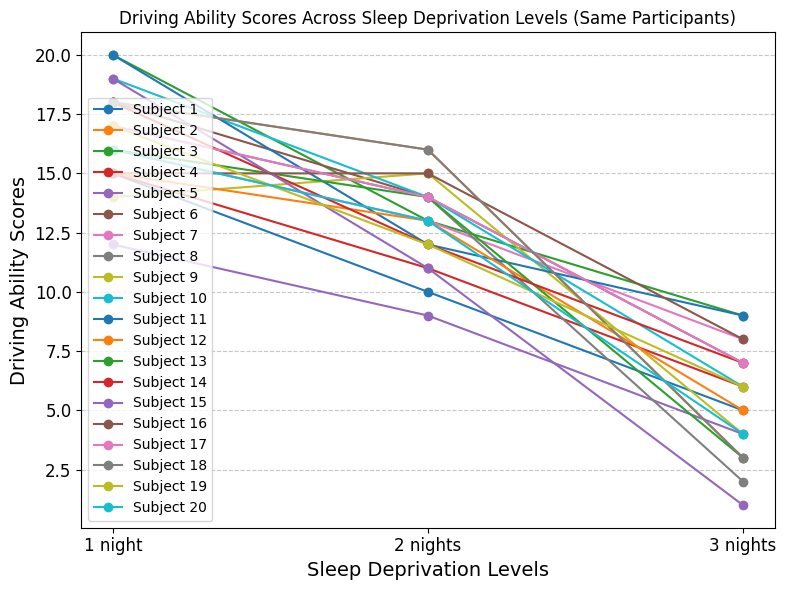

In [170]:
# Melting the dataframe
da_df_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['1 night of sleep deprivation', '2 nights of sleep deprivation', '3 nights of sleep deprivation'])

# Renaming columns
da_df_melt['subject'] = da_df_melt['index']
da_df_melt.drop(columns=['index'], inplace=True)
da_df_melt.columns = ['group', 'score', 'subject']

plt.figure(figsize=(8, 6))
for subject_id in da_df_melt['subject'].unique():
    subject_data = da_df_melt[da_df_melt['subject'] == subject_id]
    plt.plot(subject_data['group'], subject_data['score'], marker='o', label=f'Subject {subject_id}')

plt.title('Driving Ability Scores Across Sleep Deprivation Levels (Same Participants)')
plt.xlabel('Sleep Deprivation Levels', fontsize=14)
plt.ylabel('Driving Ability Scores', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['1 night', '2 nights', '3 nights'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Condition 2 - Different people in all 3 groups

We use one way ANOVA.

In [171]:
from scipy.stats import f_oneway

if all(result.pvalue > 0.05 for result in [normality_results[group] for group in data.columns]) and levene_test.pvalue > 0.05:
    
    # If all groups are normally distributed and homogeneity is met
    anova_test = f_oneway(data['1 night of sleep deprivation'], data['2 nights of sleep deprivation'], data['3 nights of sleep deprivation'])
    print('\nOne way ANOVA Test Results:')
    print(f'ANOVA test p-value = {anova_test.pvalue}')

    if anova_test.pvalue < 0.05:
        print('There is a significant difference between groups.')

        # Report effect size
        eta_squared = anova_test.statistic / (anova_test.statistic + (len(data) - 3))
        print(f'Effect size (Eta-squared) = {eta_squared}')
    else:
        print('There is no significant difference between groups.')
        
else:
    print('Data does not meet the assumptions for ANOVA.')


One way ANOVA Test Results:
ANOVA test p-value = 1.1305349928649485e-23
There is a significant difference between groups.
Effect size (Eta-squared) = 0.9002739911533663


The p-value indicates a significant difference between the groups. The Eta-squared value indicates a very large effect size, suggesting that sleep deprivation explains a substantial amount of the variance in driving ability scores.

#### Visualisation

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


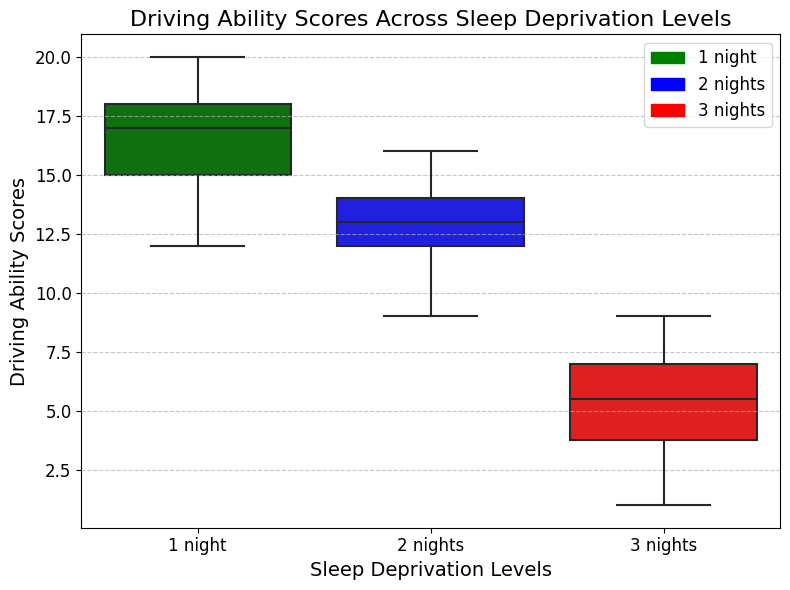

In [172]:
colors = ['green', 'blue', 'red']

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=colors)
plt.title('Driving Ability Scores Across Sleep Deprivation Levels', fontsize=16)
plt.xlabel('Sleep Deprivation Levels', fontsize=14)
plt.ylabel('Driving Ability Scores', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['1 night', '2 nights', '3 nights'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

import matplotlib.patches as mpatches
legend_labels = ['1 night', '2 nights', '3 nights']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_handles, loc='upper right', fontsize=12)

plt.show()


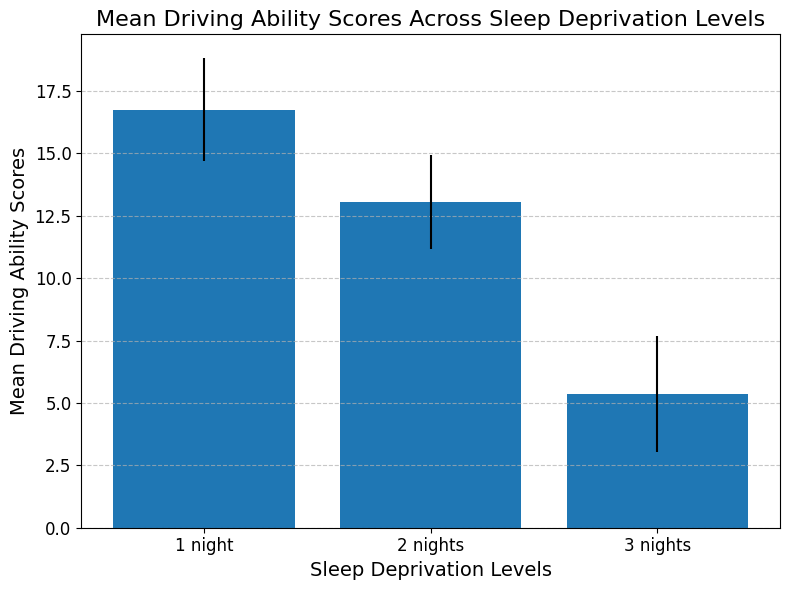

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

da_df_melt = pd.melt(data, var_name='Sleep Deprivation Levels', value_name='Driving Ability Score')

mean_scores = da_df_melt.groupby('Sleep Deprivation Levels')['Driving Ability Score'].mean()
std_scores = da_df_melt.groupby('Sleep Deprivation Levels')['Driving Ability Score'].std()
x_ticks = ['1 night', '2 nights', '3 nights']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(x_ticks, mean_scores, yerr=std_scores)
plt.title('Mean Driving Ability Scores Across Sleep Deprivation Levels', fontsize=16)
plt.xlabel('Sleep Deprivation Levels', fontsize=14)
plt.ylabel('Mean Driving Ability Scores', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Observations and Analysis

- With an escalation in sleep deprivation duration from 1 night to 3 nights, a discernible deterioration in driving ability scores becomes evident, as emphasized by the substantial effect size and visualization in the box plot.
- Noteworthy, the median score for 1 night of sleep deprivation exceeds that of 2 nights, which in turn surpasses the median score for 3 nights.
- Intriguingly, the interquartile range (IQR) remains relatively consistent across all three groups, suggesting a comparable level of variability in driving ability scores.
- These findings underscore the critical significance of adequate sleep in upholding optimal driving performance and safety, particularly during extended periods of sleep deprivation.
